In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Cardiotocographic.csv')


In [6]:
# View the first few rows and summary info
print(df.head())
print(df.info())


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-n

In [7]:
print(df.isnull().sum())


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [8]:
# Example: Fill missing values with median
df.fillna(df.median(), inplace=True)


In [10]:
# Convert data types if necessary
df['LB'] = df['LB'].astype(float)  # Example


In [11]:
# Example: IQR method for outlier detection
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [12]:
# Generate a statistical summary
summary = df.describe()
print(summary)


               LB          AC          FM          UC          DL     DS  \
count  896.000000  896.000000  896.000000  896.000000  896.000000  896.0   
mean   131.859413    0.004036    0.000606    0.004961    0.001547    0.0   
std      9.393070    0.003710    0.001346    0.002707    0.002214    0.0   
min    106.000000   -0.000122   -0.002467   -0.000101   -0.000124    0.0   
25%    125.000000    0.000006    0.000000    0.003143    0.000000    0.0   
50%    133.000000    0.003311    0.000000    0.005039    0.000000    0.0   
75%    138.000000    0.006672    0.000323    0.006927    0.003083    0.0   
max    160.000000    0.013861    0.006272    0.012072    0.008197    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  896.0  896.000000  896.000000  896.000000  896.000000  896.000000   
mean     0.0   42.465669    1.273759    3.153095    8.596245   67.784187   
std      0.0   15.055465    0.541923    6.032308    4.457159   32.370319   
min      0.

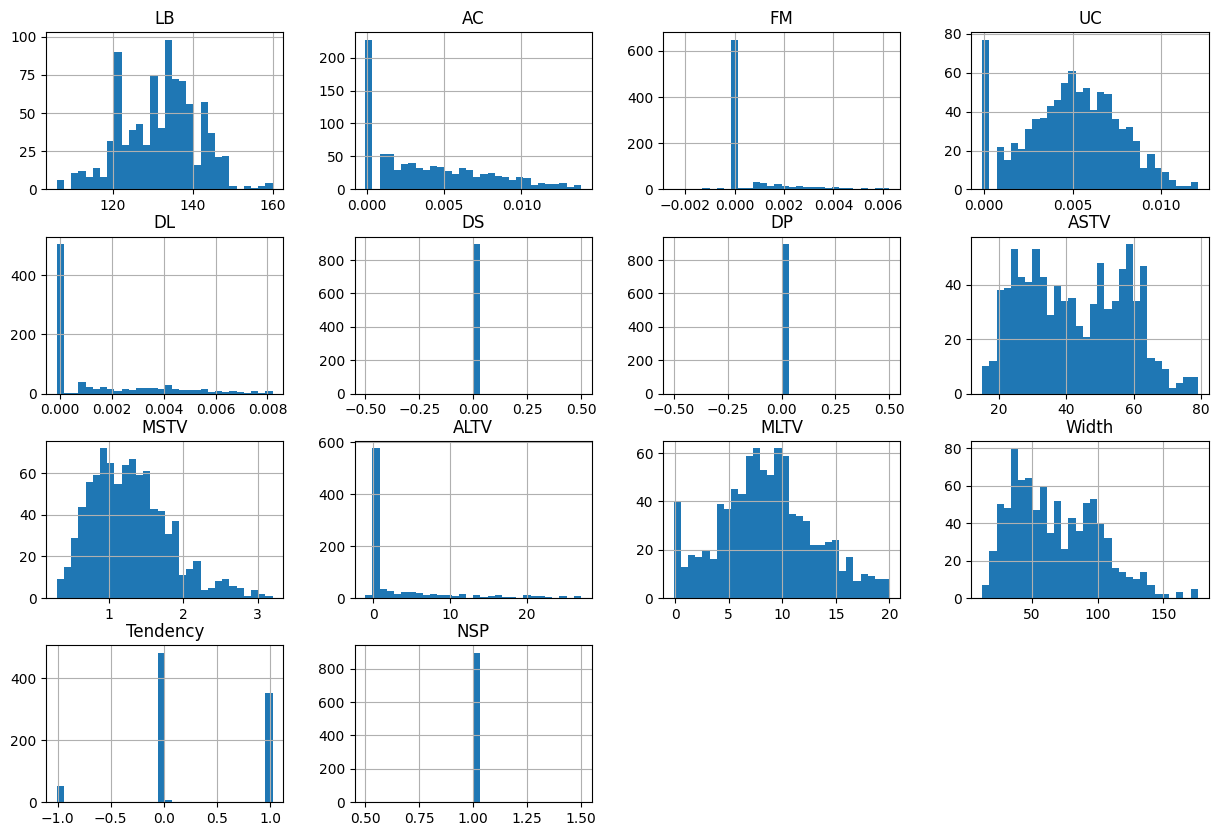

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist(figsize=(15, 10), bins=30)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

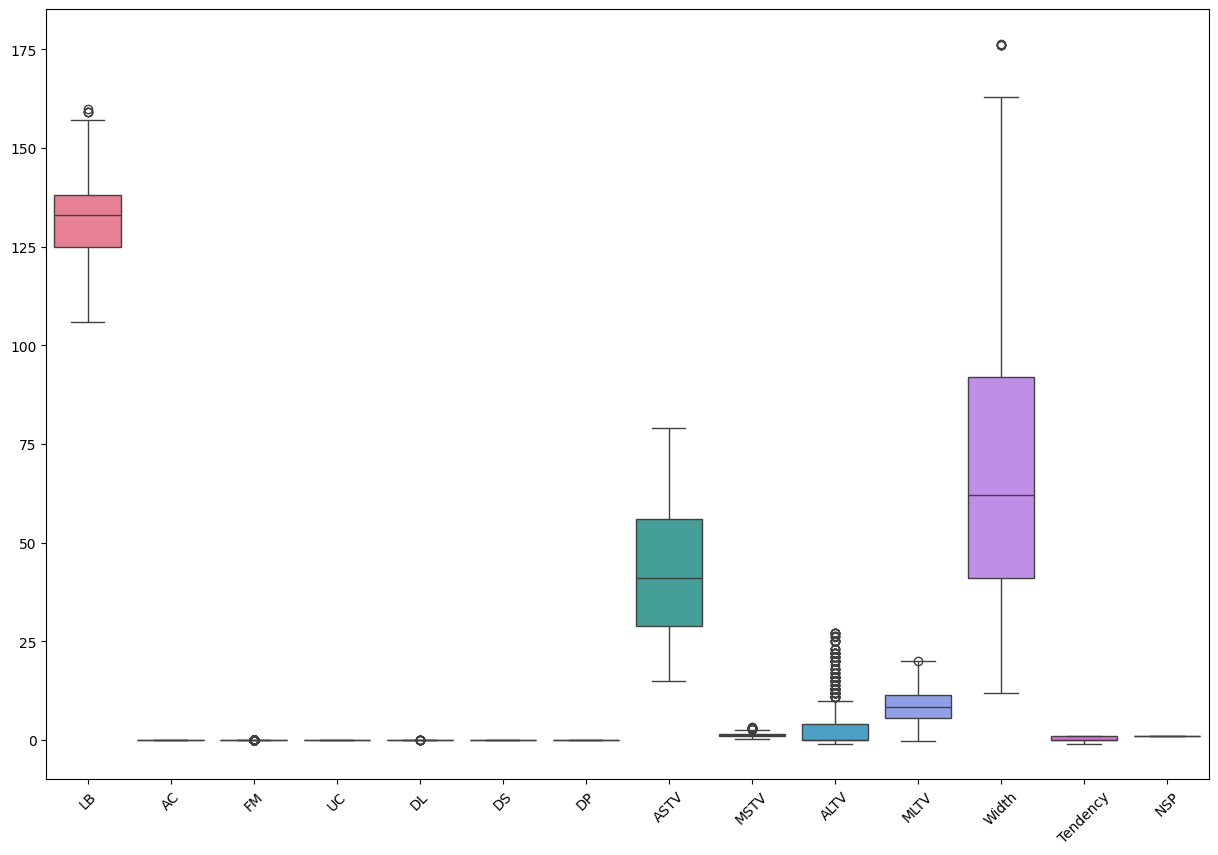

In [14]:
# Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

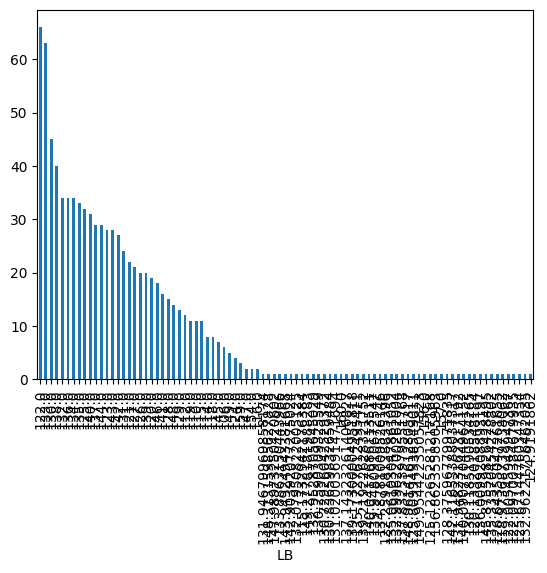

In [16]:
# Example for a categorical variable
df['LB'].value_counts().plot(kind='bar')
plt.show()


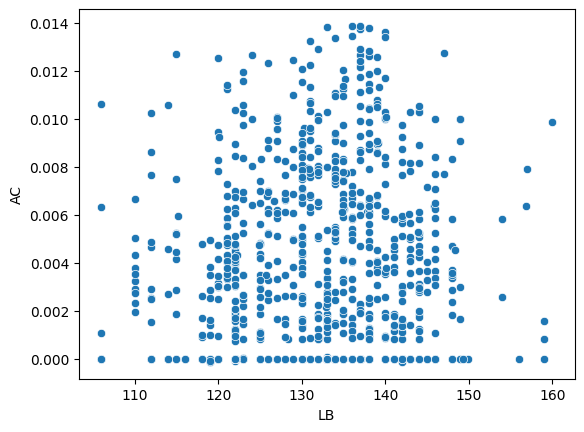

In [17]:
# Scatter plot example
sns.scatterplot(data=df, x='LB', y='AC')
plt.show()


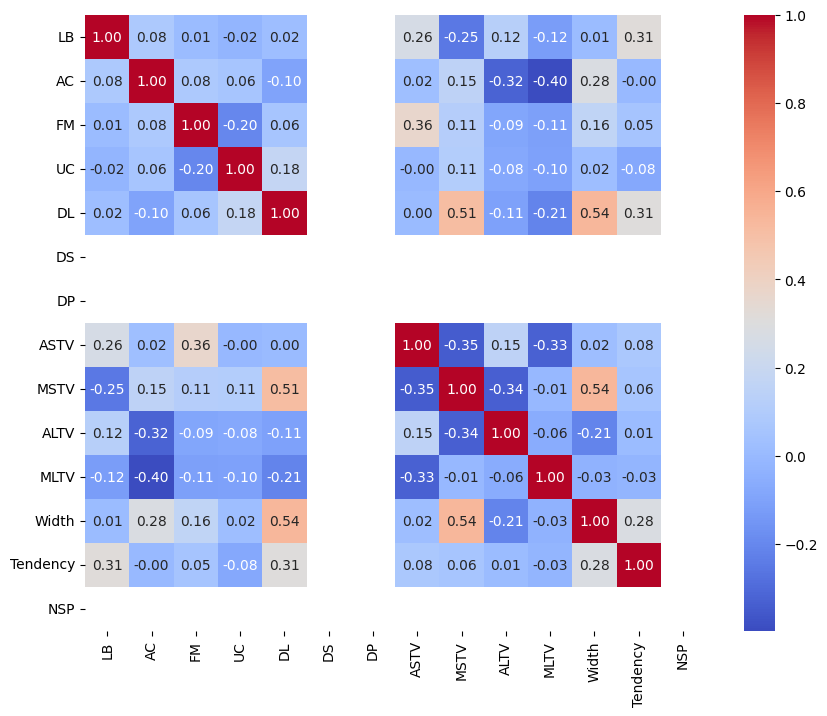

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


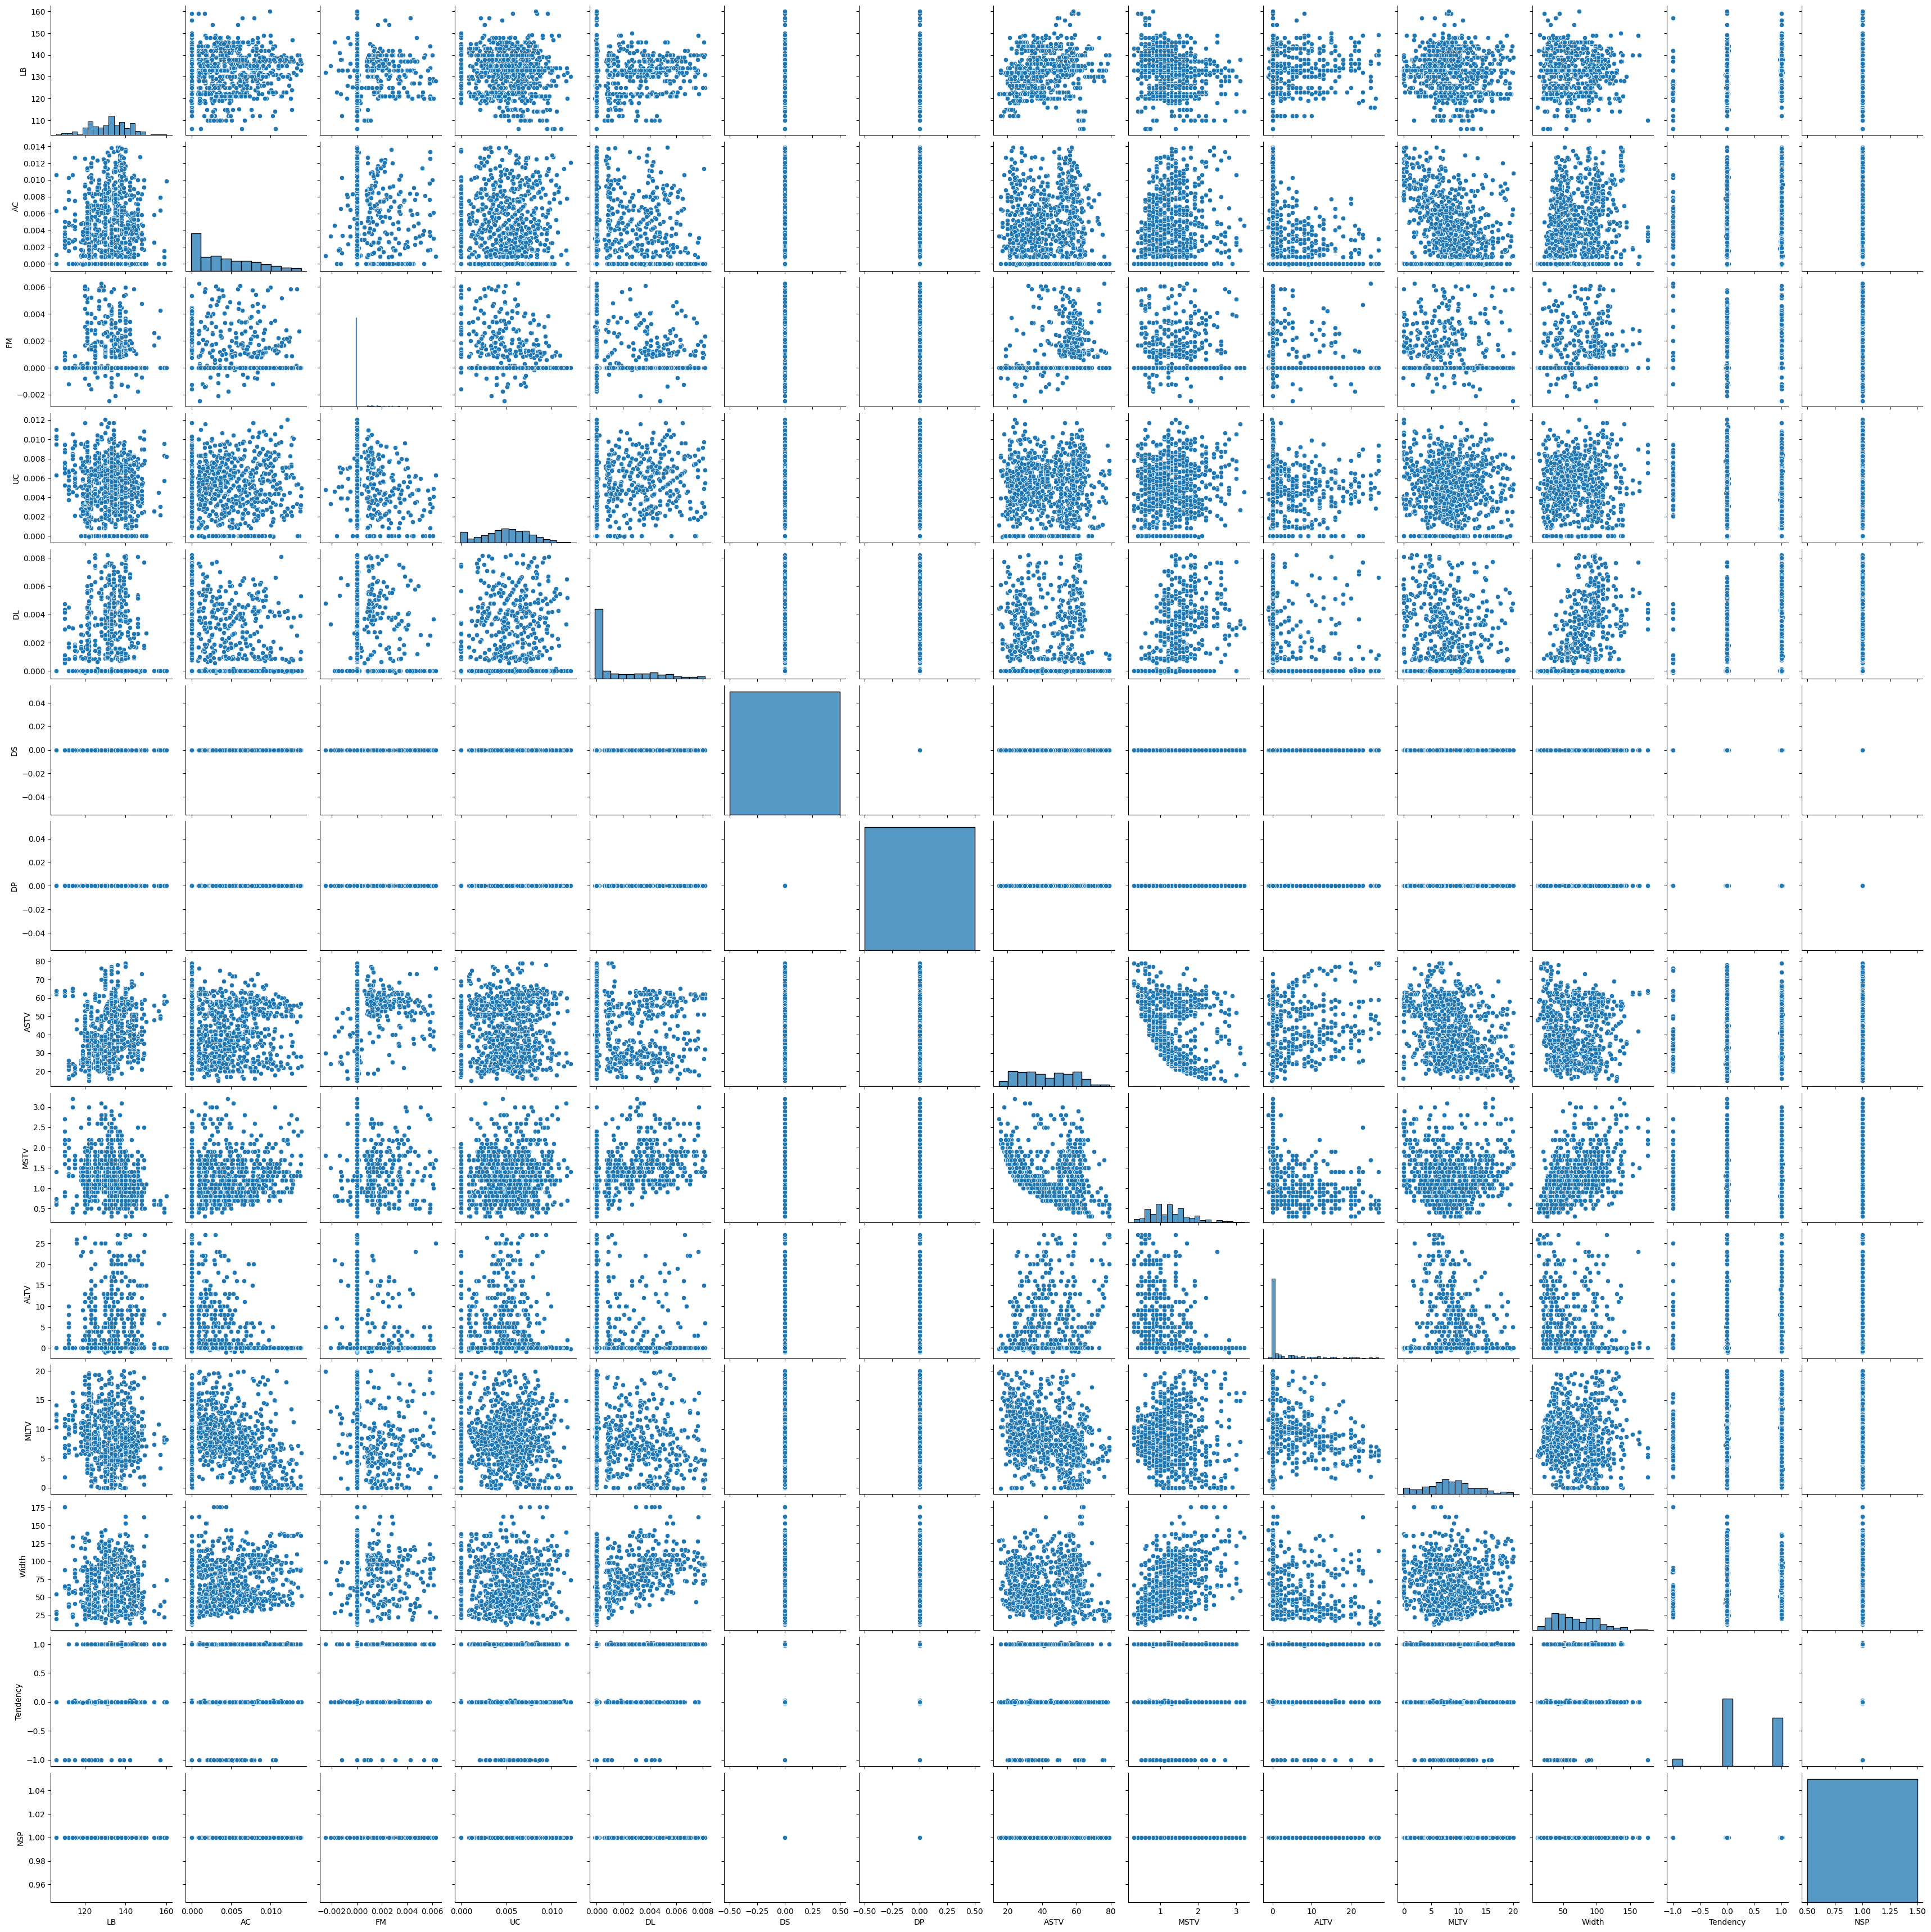

In [19]:
# Pair plots
sns.pairplot(df)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

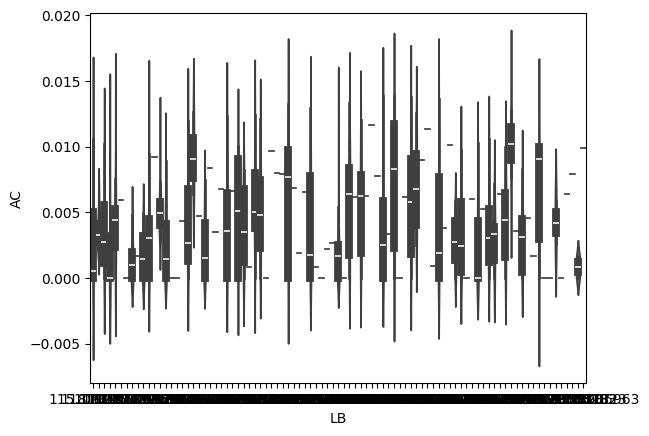

In [21]:
# Violin plots
sns.violinplot(data=df, x='LB', y='AC')
plt.show()

In [22]:
correlation = df.corr()
print(correlation['LB'].sort_values(ascending=False))


LB          1.000000
Tendency    0.314180
ASTV        0.262721
ALTV        0.123808
AC          0.078465
DL          0.020806
Width       0.011746
FM          0.007362
UC         -0.023568
MLTV       -0.118814
MSTV       -0.254885
DS               NaN
DP               NaN
NSP              NaN
Name: LB, dtype: float64


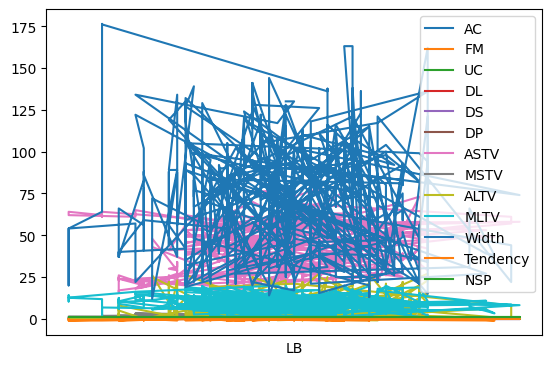

In [25]:
# Assuming there's a time variable
df['LB'] = pd.to_datetime(df['LB'])
df.set_index('LB').plot()
plt.show()


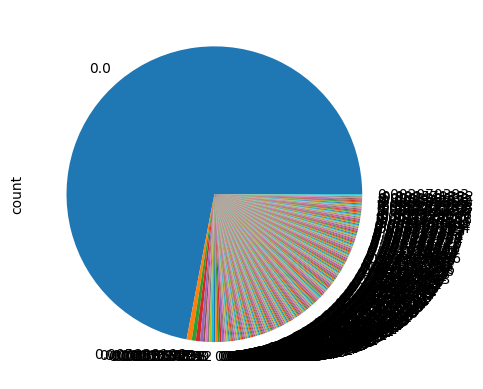

In [27]:
# Example for a categorical variable
df['FM'].value_counts().plot(kind='pie')
plt.show()


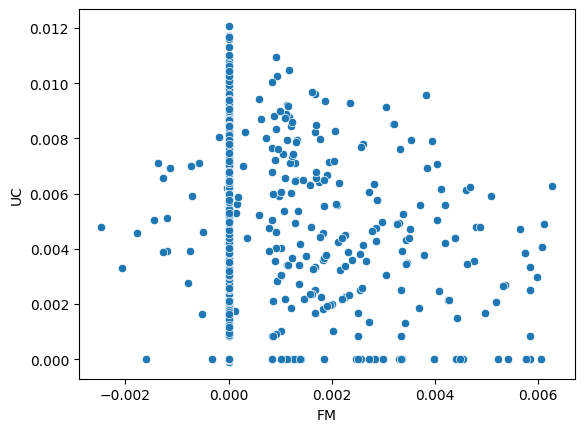

In [28]:
# Scatter plot example
sns.scatterplot(data=df, x='FM', y='UC')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

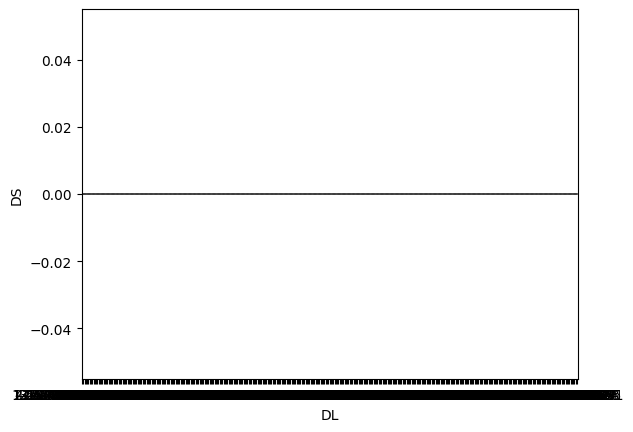

In [29]:
# Violin plots
sns.violinplot(data=df, x='DL', y='DS')
plt.show()

In [30]:
correlation = df.corr()
print(correlation['ASTV'].sort_values(ascending=False))


ASTV        1.000000
FM          0.362630
LB          0.263176
ALTV        0.150569
Tendency    0.076076
AC          0.024343
Width       0.017810
DL          0.001806
UC         -0.004523
MLTV       -0.330139
MSTV       -0.347374
DS               NaN
DP               NaN
NSP              NaN
Name: ASTV, dtype: float64


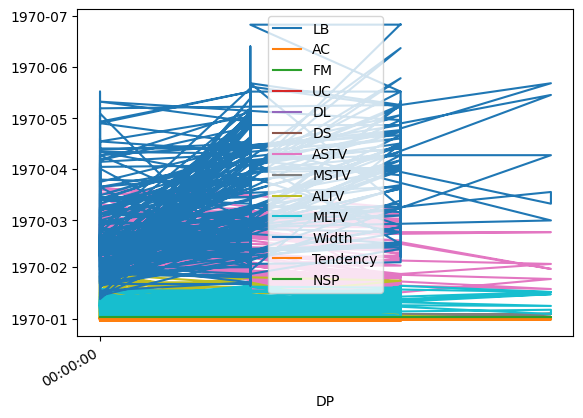

In [32]:
# Assuming there's a time variable
df['DP'] = pd.to_datetime(df['MSTV'])
df.set_index('DP').plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

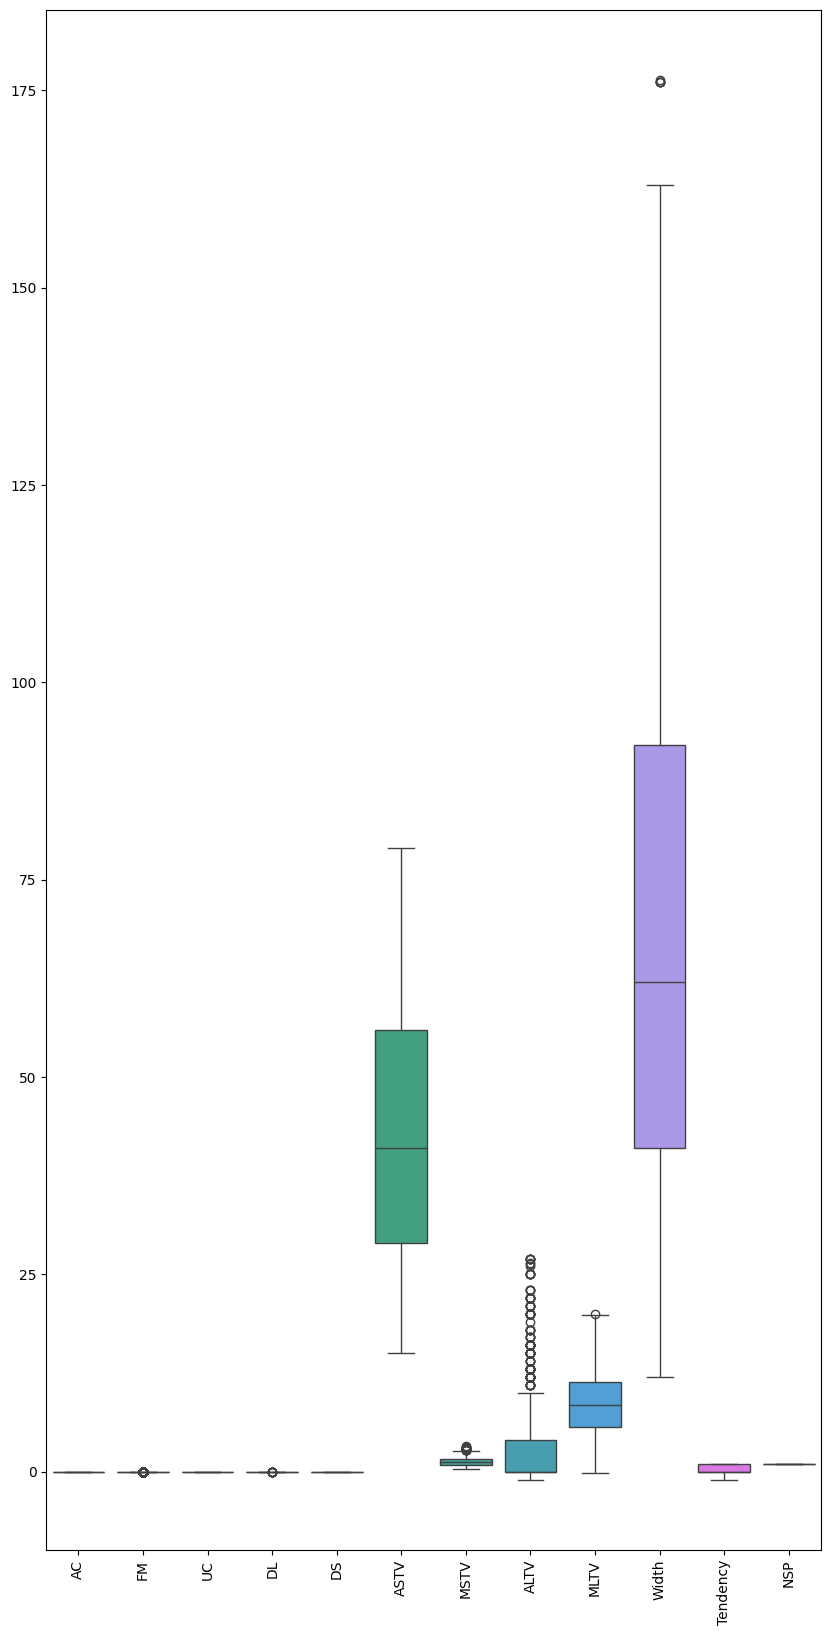

In [33]:
# Boxplot
plt.figure(figsize=(10, 20))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()